This notebook demonstrates the use of PmagPy functions from within a  Jupyter notebook in parallel with the PmagPy cookbook http://earthref.org/PmagPy/cookbook.

It is meant to function from within the PmagPy data_files/notebooks directory and calls are relative to that.  

First, we import the pmagpy modules, **pmagplotlib**, **pmag** and **ipmag** and some other handy funcions for use in the notebook.

In [1]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
from importlib import reload


## angle

There are several ways to use this from the notebook - one loading the data into a Pandas dataframe, then convert to the desired arrays, or load directly into a Numpy array of desired shape.  

In [2]:
help(pmag.angle)

Help on function angle in module pmagpy.pmag:

angle(D1, D2)
    Calculate the angle between two directions.
    
    Parameters
    ----------
    D1 : Direction 1 as an array of [declination, inclination] pair or pairs
    D2 : Direction 2 as an array of [declination, inclination] pair or pairs
    
    Returns
    -------
    angle : angle between the directions as a single-element array
    
    Examples
    --------
    >>> pmag.angle([350.0,10.0],[320.0,20.0])
    array([ 30.59060998])



In [3]:
# Pandas way:
di=pd.read_csv('../angle/angle.dat',delim_whitespace=True,header=None)
#rename column headers
di.columns=['Dec1','Inc1','Dec2','Inc2']
# call pmag.angle
pmag.angle(di[['Dec1','Inc1']].values,di[['Dec2','Inc2']].values)

array([  75.92745193,  119.10251273,  103.65330599,   81.42586582,
        120.1048559 ,  100.8579262 ,   95.07347774,   74.10981614,
         78.41266977,  120.05285684,  114.36156914,   66.30664335,
         85.38356936,   95.07546203,   93.84174   ,   93.116631  ,
        105.39087299,   71.78167883,  104.04746653,   93.84450445,
         93.29827337,   96.34377954,   90.14271929,  112.17559328,
         90.06592091,  120.00493016,   75.31604123,   86.19902246,
         85.85667799,   82.64834934,  115.51261896,   99.28623007,
         65.9466766 ,   90.55185269,   90.50418859,   84.49253198,
         93.00731365,   67.47153733,   76.84279617,   83.80354   ,
        128.3068145 ,   91.690954  ,   46.87441241,  110.66917836,
        103.69699188,   64.35444341,   81.94448359,   94.01817998,
        121.19588845,   83.64445512,  113.72812352,   76.38276774,
        113.38742874,   74.09024232,   79.42493098,   74.92842387,
         90.5556631 ,   91.44844861,  112.71773111,   77.26775

In [206]:
# Numpy way:
di=np.loadtxt('../angle/angle.dat').transpose() # read in file
D1=di[0:2].transpose() # assign to first array
D2=di[2:].transpose() # assign to second array
pmag.angle(D1,D2) # call pmag.angle

array([  75.92745193,  119.10251273,  103.65330599,   81.42586582,
        120.1048559 ,  100.8579262 ,   95.07347774,   74.10981614,
         78.41266977,  120.05285684,  114.36156914,   66.30664335,
         85.38356936,   95.07546203,   93.84174   ,   93.116631  ,
        105.39087299,   71.78167883,  104.04746653,   93.84450445,
         93.29827337,   96.34377954,   90.14271929,  112.17559328,
         90.06592091,  120.00493016,   75.31604123,   86.19902246,
         85.85667799,   82.64834934,  115.51261896,   99.28623007,
         65.9466766 ,   90.55185269,   90.50418859,   84.49253198,
         93.00731365,   67.47153733,   76.84279617,   83.80354   ,
        128.3068145 ,   91.690954  ,   46.87441241,  110.66917836,
        103.69699188,   64.35444341,   81.94448359,   94.01817998,
        121.19588845,   83.64445512,  113.72812352,   76.38276774,
        113.38742874,   74.09024232,   79.42493098,   74.92842387,
         90.5556631 ,   91.44844861,  112.71773111,   77.26775

## ani_depthplot
We will use the **ipmag** version of this program which assumes the MagIC data model 3. If you want datamodel 2, just use **ipmag.ani_depthplot2().  

In [5]:
help(ipmag.ani_depthplot)

Help on function ani_depthplot in module pmagpy.ipmag:

ani_depthplot(spec_file='specimens.txt', samp_file='samples.txt', meas_file='measurements.txt', site_file='sites.txt', age_file=None, sum_file=None, fmt='svg', dmin=-1, dmax=-1, depth_scale='core_depth', dir_path='.')
    returns matplotlib figure with anisotropy data plotted against depth
    available depth scales: 'composite_depth', 'core_depth' or 'age' (you must provide an age file to use this option)



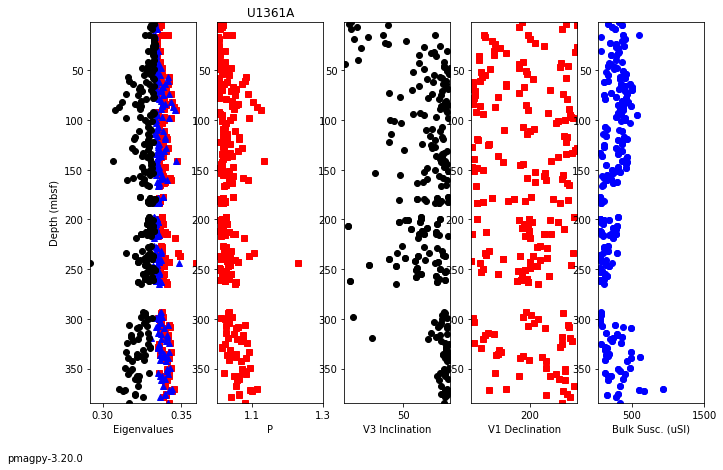

In [6]:
ipmag.ani_depthplot(dir_path='../../data_files/ani_depthplot');

## aniso_magic

In notebooks, we can use:  **ipmag.aniso_magic_nb()**.  There are two example files, one from some sediments, which we can compare the V3 direction with vertical, and a dike which we can compare directions with the plane of the dike.  

In [247]:
help(ipmag.aniso_magic_nb)

Help on function aniso_magic_nb in module pmagpy.ipmag:

aniso_magic_nb(infile='specimens.txt', samp_file='', site_file='', verbose=1, ipar=0, ihext=1, ivec=0, isite=0, iloc=0, iboot=0, vec=0, Dir=[], PDir=[], crd='s', num_bootstraps=1000, dir_path='.')
    Makes plots of anisotropy eigenvectors, eigenvalues and confidence bounds
    Inputs:
        verbose : if True, print messages to output
        Data Model 3.0 only formated files:
            infile : specimens formatted file with aniso_s data
            samp_file : samples formatted file with sample => site relationship
            site_file : sites formatted file with site => location relationship
        isite : if True plot by site, requires non-blank samp_file
        iloc : if True plot by location, requires non-blank samp_file, and site_file
        Dir : [Dec,Inc] list for comparison direction
        vec : eigenvector for comparison with Dir
        PDir : [Pole_dec, Pole_Inc] for pole to plane for comparison
        crd

-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
desired coordinate system not available, using available:  g


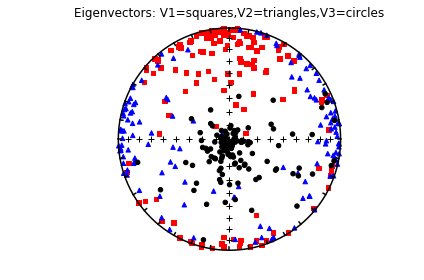

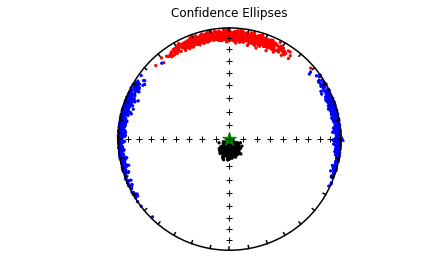

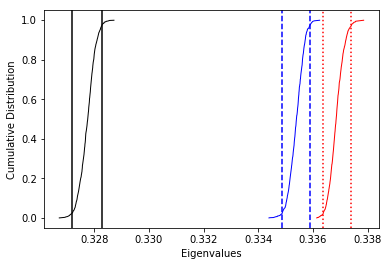

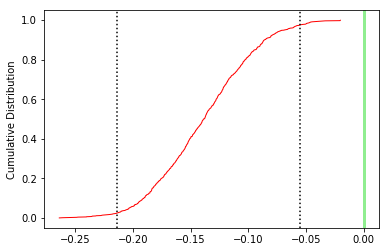

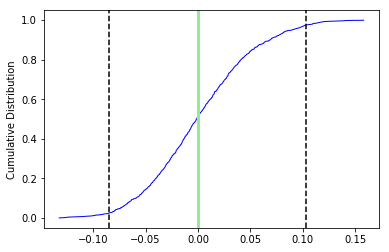

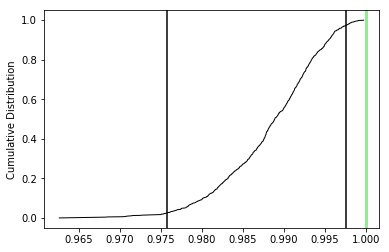

In [248]:
ipmag.aniso_magic_nb(infile='sed_specimens.txt',dir_path='../aniso_magic',\
       iboot=1,ihext=0,ivec=1,Dir=[0,90],vec=3,ipar=1) # parametric bootstrap and compare V3 with vertical

-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
desired coordinate system not available, using available:  g


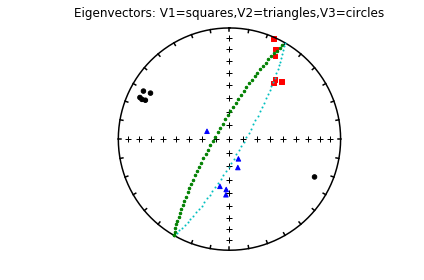

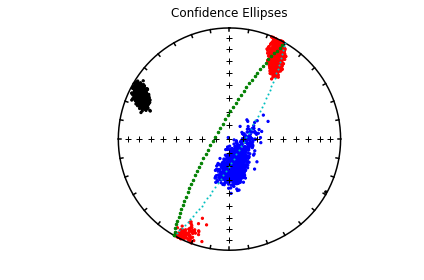

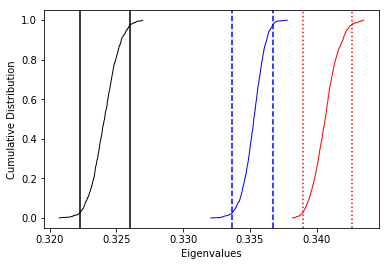

In [249]:
ipmag.aniso_magic_nb(infile='dike_specimens.txt',dir_path='../aniso_magic',\
       iboot=1,ihext=0,ivec=1,PDir=[120,10],ipar=1) # compare dike directions with plane of dike with pole of 120,10

In [240]:
ax=plt.figure()
help(ax.add_subplot)

Help on method add_subplot in module matplotlib.figure:

add_subplot(*args, **kwargs) method of matplotlib.figure.Figure instance
    Add a subplot.
    
    Parameters
    ----------
    *args
        Either a 3-digit integer or three separate integers
        describing the position of the subplot. If the three
        integers are I, J, and K, the subplot is the Ith plot on a
        grid with J rows and K columns.
    
    projection : ['aitoff' | 'hammer' | 'lambert' | 'mollweide', 'polar' | 'rectilinear'], optional
        The projection type of the axes.
    
    polar : boolean, optional
        If True, equivalent to projection='polar'.
    
    This method also takes the keyword arguments for
    :class:`~matplotlib.axes.Axes`.
    
    Returns
    -------
    axes : Axes
        The axes of the subplot.
    
    Notes
    -----
    If the figure already has a subplot with key (*args*,
    *kwargs*) then it will simply make that subplot current and
    return it.  This behavi

## apwp

This program calls the function **pmag.bc02** which returns the pole for the plate for that age.  

apwp.py then does the favor of calling **pmag.vgp_di** to calculate the direction at the desired location (**site_lat** and **site_lon**) and pmag.magnetic_lat() to get the paleolatitude.  

This can all be done directly from within the notebook.


In [16]:
help(pmag.bc02)

Help on function bc02 in module pmagpy.pmag:

bc02(data)
    get APWP from Besse and Courtillot 2002 paper
    
    Parameters
    ----------
    Takes input as [plate, site_lat, site_lon, age]
    plate : string (options: AF, ANT, AU, EU, GL, IN, NA, SA)
    site_lat : float
    site_lon : float
    age : float in Myr
    
    Returns
    ----------



In [17]:
data=['NA',33,-117,100]
pole_lat,pole_lon=pmag.bc02(data)
dec,inc=pmag.vgp_di(pole_lat,pole_lon,data[1],data[2])
paleo_lat=pmag.magnetic_lat(inc)
print (' Age   Paleolat.   Dec.   Inc.   Pole_lat.  Pole_Long.')
print ('%7.1f %7.1f %7.1f %7.1f %7.1f  %7.1f\n' \
       %(data[3],paleo_lat,dec,inc,pole_lat,pole_lon))


 Age   Paleolat.   Dec.   Inc.   Pole_lat.  Pole_Long.
  100.0    38.8   352.4    58.1    81.5    198.3



## b_vdm.py

b_vdm.py calls **pmag.b_vdm()** which we can do directly from within the notebook

In [18]:
help(pmag.b_vdm)

Help on function b_vdm in module pmagpy.pmag:

b_vdm(B, lat)
    Converts a magnetic field value (input in units of tesla) to a virtual
    dipole moment (VDM) or a virtual axial dipole moment (VADM; output
    in units of Am^2)
    
    Parameters
    ----------
    B: local magnetic field strength in tesla
    lat: latitude of site in degrees
    
    Returns
    ----------
    V(A)DM in units of Am^2



In [19]:
b,lat=33e-6,22 # field (in tesla), and latitude
pmag.b_vdm(b,lat) # output in Am^2

7.1588159745117882e+22

## biplot_magic 

We can reproduce the plots that biplot_magic make using Pandas.  The key to what measurements mean is in the method codes, so we can first get a unique list of method_codes, then plot one against the other.  Let's read in the data file in to a Pandas dataframe and exctract the method codes: 

In [20]:
meas=pd.read_csv('../biplot_magic/measurements.txt',sep='\t',header=1)
print(meas.method_codes.unique())
meas.head()

['LT-AF-Z' 'LT-AF-I' 'LT-IRM' 'LP-X']


,citations,dir_dec,dir_inc,experiment,magn_mass,meas_temp,measurement,method_codes,quality,specimen,standard,susc_chi_mass,treat_ac_field,treat_dc_field,treat_step_num,treat_temp
0,This study,268.5,-41.2,15-1-013:LP-AF-DIR,0.000003,300,15-1-013:LP-AF-DIR-1,LT-AF-Z,g,15-1-013,u,NaN,0.015,0.00000,1.0,300
1,This study,NaN,NaN,15-1-013:LP-ARM,0.000179,300,15-1-013:LP-ARM-2,LT-AF-I,g,15-1-013,u,NaN,0.080,0.00005,2.0,300
2,This study,NaN,NaN,15-1-013:LP-IRM,0.003600,300,15-1-013:LP-IRM-3,LT-IRM,g,15-1-013,u,NaN,0.000,1.00000,3.0,300
3,This study,NaN,NaN,15-1-013:LP-X,NaN,300,15-1-013:LP-X-4,LP-X,NaN,15-1-013,NaN,2.380000e-07,0.010,0.00000,4.0,300
4,This study,181.0,68.6,15-1-022:LP-AF-DIR,0.000011,300,15-1-022:LP-AF-DIR-5,LT-AF-Z,g,15-1-022,u,NaN,0.015,0.00000,5.0,300


These are an AF demag step, an ARM, an IRM and a susceptibility.  Now we can fish out data for each method, merge them by specimen, dropping any missing measurements and plot one against the other.  

In [21]:
IRM=meas[meas.method_codes.str.contains('LT-IRM')]
IRM=IRM[['specimen','magn_mass']]
IRM.columns=['specimen','IRM']
ARM=meas[meas.method_codes.str.contains('LT-AF-I')]
ARM=ARM[['specimen','magn_mass']]
ARM.columns=['specimen','ARM']
CHI=meas[meas.method_codes.str.contains('LP-X')]
CHI=CHI[['specimen','susc_chi_mass']]  
CHI.columns=['specimen','CHI']
RMRMs=pd.merge(IRM,ARM,on='specimen')
RMRMs=pd.merge(RMRMs,CHI,on='specimen')

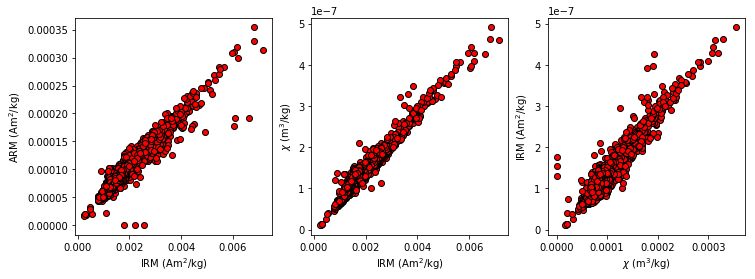

In [24]:
fig=plt.figure(1, (12,4))
fig.add_subplot(131)
plt.plot(RMRMs.IRM,RMRMs.ARM,'ro',markeredgecolor='black')
plt.xlabel('IRM (Am$^2$/kg)')
plt.ylabel('ARM (Am$^2$/kg)')
fig.add_subplot(132)
plt.plot(RMRMs.IRM,RMRMs.CHI,'ro',markeredgecolor='black')
plt.xlabel('IRM (Am$^2$/kg)')
plt.ylabel('$\chi$ (m$^3$/kg)')
fig.add_subplot(133)
plt.plot(RMRMs.ARM,RMRMs.CHI,'ro',markeredgecolor='black')
plt.xlabel('$\chi$ (m$^3$/kg)')
plt.ylabel('IRM (Am$^2$/kg)');

## cart_dir
cart_dir.py calls pmag.cart2dir()  which we can call directly from the notebook

In [25]:
help(pmag.cart2dir)

Help on function cart2dir in module pmagpy.pmag:

cart2dir(cart)
    Converts a direction in cartesian coordinates into declination, inclinations
    
    Parameters
    ----------
    cart : input list of [x,y,z]
    
    Returns
    -------
    direction_array : returns an array of [declination, inclination, intensity]
    
    Examples
    --------
    >>> pmag.cart2dir([0,1,0])
    array([ 90.,   0.,   1.])



In [26]:
# read in data file from example file
cart=np.loadtxt('../cart_dir/cart_dir_example.dat')
print ('Input: \n',cart)
print ('Output: \n',pmag.cart2dir(cart))

Input: 
 [[ 0.3971 -0.1445  0.9063]
 [-0.5722  0.04   -0.8192]]
Output: 
 [[ 340.00415104   65.00211761    0.99997417]
 [ 176.00120788  -55.00063858    1.00005074]]


## chi_magic.py 
chi_magic.py reads in a MagIC data model 2.5 file, and makes various plots.  ../chi_magic/measurements.txt has bee upgraded to  We can reproduce these with Pandas...  

In [27]:
# read in data from data model 3 example file
chi_data=pd.read_csv('../chi_magic/measurements.txt',sep='\t',header=1)
print (chi_data.columns)
# get arrays of available temps, frequencies and fields
Ts=np.sort(chi_data.meas_temp.unique())
Fs=np.sort(chi_data.meas_freq.unique())
Bs=np.sort(chi_data.meas_field_ac.unique())


Index(['citations', 'experiment', 'instrument_codes', 'meas_field_ac',
       'meas_freq', 'meas_temp', 'method_codes', 'specimen',
       'susc_chi_qdr_volume', 'susc_chi_volume', 'timestamp'],
      dtype='object')


Text(0.5,1,'B = 3.00e-04 T')

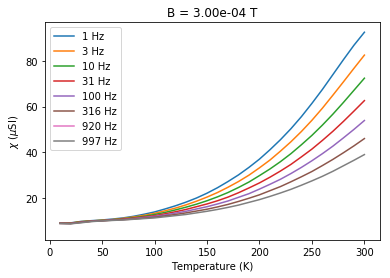

In [28]:
# plot chi versus temperature at constant field
b=Bs.max()
for f in Fs:
    this_f=chi_data[chi_data.meas_freq==f]
    this_f=this_f[this_f.meas_field_ac==b]
    plt.plot(this_f.meas_temp,1e6*this_f.susc_chi_volume,label='%i'%(f)+' Hz')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('$\chi$ ($\mu$SI)')
plt.title('B = '+'%7.2e'%(b)+ ' T')

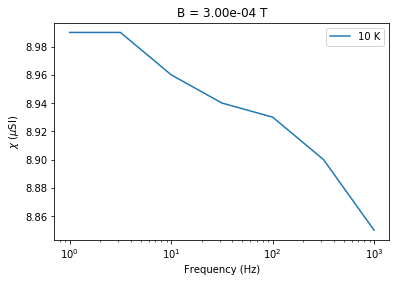

In [29]:
# plot chi versus frequency at constant B
b=Bs.max()
t=Ts.min()
this_t=chi_data[chi_data.meas_temp==t]
this_t=this_t[this_t.meas_field_ac==b]
plt.semilogx(this_t.meas_freq,1e6*this_t.susc_chi_volume,label='%i'%(t)+' K')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('$\chi$ ($\mu$SI)')
plt.title('B = '+'%7.2e'%(b)+ ' T');

## common_mean
ipmag.common_mean_bootrap does the same job as the command line program common_mean.py 

In [30]:
help(ipmag.common_mean_bootstrap)

Help on function common_mean_bootstrap in module pmagpy.ipmag:

common_mean_bootstrap(Data1, Data2, NumSims=1000, save=False, save_folder='.', fmt='svg', figsize=(7, 2.3), x_tick_bins=4)
    Conduct a bootstrap test (Tauxe, 2010) for a common mean on two declination,
    inclination data sets. Plots are generated of the cumulative distributions
    of the Cartesian coordinates of the means of the pseudo-samples (one for x,
    one for y and one for z). If the 95 percent confidence bounds for each
    component overlap, the two directions are not significantly different.
    
    Parameters
    ----------
    Data1 : a nested list of directional data [dec,inc] (a di_block)
    Data2 : a nested list of directional data [dec,inc] (a di_block)
    NumSims : number of bootstrap samples (default is 1000)
    save : optional save of plots (default is False)
    save_folder : path to directory where plots should be saved
    fmt : format of figures to be saved (default is 'svg')
    figsize : 

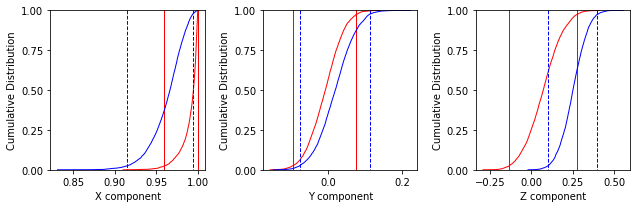

In [31]:
directions_A=np.loadtxt('../common_mean/common_mean_ex_file1.dat')
directions_B=np.loadtxt('../common_mean/common_mean_ex_file2.dat') 
ipmag.common_mean_bootstrap(directions_A,directions_B,figsize=(9,3))

## cont_rot 
This program reads in the outlines of continents from **continents.get_cont()**, rotates around a rotation pole and angle as specified by the age  and continent in question (from **frp.get_pole()** using **pmag.ptROT()**.  It then plots them using basemap in **pmagplotlib.plotMAP()** (or **pmagplotlib.plot_map** for cartopy version.  Here will will reproduce it more directly through the notebook.  

In [32]:
# load in the continents module
import pmagpy.continents as continents
import pmagpy.frp as frp
help(continents.get_continent)

Help on function get_continent in module pmagpy.continents:

get_continent(continent)
    get_continent(continent)
    returns the outlines of specified continent.
    
    Parameters:
    ____________________
    continent:
        af : Africa
        congo : Congo
        kala : Kalahari
        aus : Australia
        balt : Baltica
        eur : Eurasia
        ind : India
        sam : South America
        ant : Antarctica
        grn : Greenland
        lau : Laurentia
        nam : North America
        gond : Gondawanaland
    Returns : 
        array of [lat/long] points defining continent



In [33]:
help(pmagplotlib.plotMAP)

Help on function plotMAP in module pmagpy.pmagplotlib:

plotMAP(fignum, lats, lons, Opts)
    plotMAP(fignum, lats,lons,Opts)
    makes a basemap with lats/lons
        Windows 10 users, see plot_map
    Parameters:
    _______________
    fignum : matplotlib figure number
    lats : array or list of latitudes
    lons : array or list of longitudes
    Opts : dictionary of plotting options: 
        Opts.keys=
            latmin : minimum latitude for plot
            latmax : maximum latitude for plot
            lonmin : minimum longitude for plot
            lonmax : maximum longitude
            lat_0 : central latitude
            lon_0 : central longitude
            proj : projection [basemap projections, e.g., moll=Mollweide, merc=Mercator, ortho=orthorhombic,
                lcc=Lambert Conformal]
            sym : matplotlib symbol
            symsize : symbol size in pts
            pltgrid : plot the grid [1,0]
            res :  resolution [c,l,i,h] for crude, low, interme

/Users/ltauxe/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


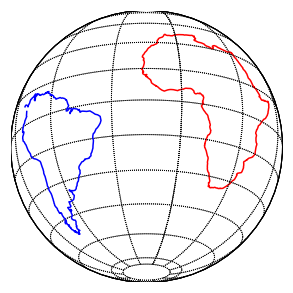

In [34]:
# retrieve continental outline
af=continents.get_continent('af').transpose()
sam=continents.get_continent('sam').transpose()


#define options for pmagplotlib.plotMAP
plt.figure(1,(5,5))
Opts = {'latmin': -90, 'latmax': 90, 'lonmin': 0., 'lonmax': 360., 'lat_0': -20, \
            'lon_0': 345,'proj': 'ortho', 'sym': 'r-', 'symsize': 3,\
            'pltgrid': 0, 'res': 'c', 'boundinglat': 0.}
pmagplotlib.plotMAP(1,af[0],af[1],Opts)
Opts['sym']='b-'
pmagplotlib.plotMAP(1,sam[0],sam[1],Opts)

Now for the rotation part.  These are in a function called frp.get_pole()

In [35]:
help(frp.get_pole)

Help on function get_pole in module pmagpy.frp:

get_pole(continent, age)
    get_pole(continent,age)
    returns rotation poles and angles for specified continents and ages
    assumes fixed Africa.  
    Parameters:
        continent : 
            aus : Australia
            eur : Eurasia
            mad : Madacascar
            [nwaf,congo] : NW Africa  [choose one]
            col :  Colombia
            grn : Greenland
            nam : North America
            par : Paraguay
            eant :  East Antarctica
            ind : India
            [neaf,kala] : NE Africa [choose one]
            [sac,sam] :  South America [choose one]
            ib : Iberia
            saf : South Africa
      Outputs:
          returns  [pole longitude, pole latitude, rotation angle] for the continent at specified age



In [36]:
# get the rotation pole for south america relative to South Africa at 180 Ma
sam_pole=frp.get_pole('sam',180)
# NB: for african rotations, first rotate other continents to fixed Africa, then 
# rotate with South African pole (saf)


The rotation is done by pmag.PTrot.

In [37]:
help(pmag.PTrot)

Help on function PTrot in module pmagpy.pmag:

PTrot(EP, Lats, Lons)
    Rotates points on a globe by an Euler pole rotation using method of
    Cox and Hart 1986, box 7-3.
    
    Parameters
    ----------
    EP : Euler pole list [lat,lon,angle]
    Lats : list of latitudes of points to be rotated
    Lons : list of longitudes of points to be rotated



so here we go...  

/Users/ltauxe/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


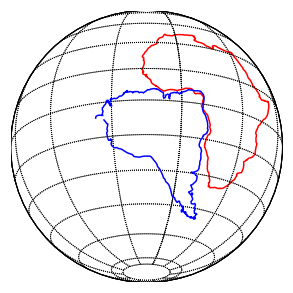

In [38]:
plt.figure(1,(5,5))
sam_rot=pmag.PTrot(sam_pole,sam[0],sam[1]) # same for south america
# and plot 'em
Opts['sym']='r-'
pmagplotlib.plotMAP(1,af[0],af[1],Opts)
Opts['sym']='b-'
pmagplotlib.plotMAP(1,sam_rot[0],sam_rot[1],Opts)

## core_depthplot

This can be done using the wonders of Pandas data frames using the data_model 3 data in the example data file folder.  


Let's do things this way:
- read in the data from the sites and specimens files.
- Drop the records with NaN for analysts, keeping one of the three lines available for each specimen. 
- Make a new column named **site** in the specdimens table that is the same as the **specimen** column.
- (this makes sense because these are core data, so the specimen=sample=site. )
- Merge the two DataFrames on the **site** column.
- filter the data for depths between 50 and 150.
- Plot **dir_inc** versus **core_depth**.  
- Put on GAD field inclination
- plot the time scale

In [2]:
sites=pd.read_csv('../core_depthplot/sites.txt',sep='\t',header=1)
specimens=pd.read_csv('../core_depthplot/specimens.txt',sep='\t',header=1)
specimens=specimens.dropna(subset=['analysts']) # kill unwanted lines with duplicate or irrelevent info
specimens['site']=specimens['specimen'] # make a column with site name
data=pd.merge(specimens,sites,on='site') # merge the two data frames on site
data=data[data.core_depth>50] # all levels > 50
data=data[data.core_depth<150] # and < 150
lat=sites.site_lat.unique()[0] # we need this for the GAD INC


Plot versus core_depth

And now versus age:

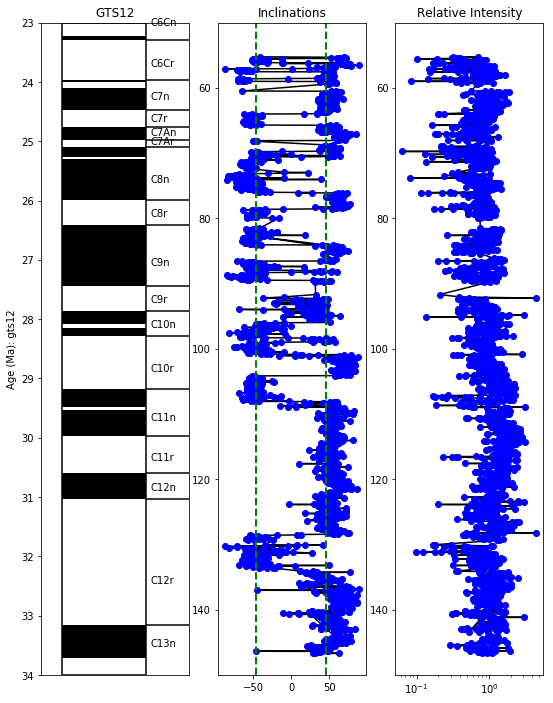

In [6]:
fig=plt.figure(1,(9,12))
ax=fig.add_subplot(131)
pmagplotlib.plot_ts(ax,23,34,timescale='gts12')
fig.add_subplot(132)
plt.plot(data.dir_inc,data.core_depth,'k-')
plt.plot(data.dir_inc,data.core_depth,'bo')
plt.ylim(35,23)
#plt.ylabel('Age (Ma)')
gad=np.degrees(np.arctan(2.*np.tan(np.radians(lat)))) # tan (I) = 2 tan (lat)
plt.axvline(gad,color='green',linestyle='dashed',linewidth=2)
plt.axvline(-gad,color='green',linestyle='dashed',linewidth=2)
plt.title('Inclinations')
plt.ylim(150,50)
fig.add_subplot(133)
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'k-')
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'bo')
plt.ylim(150,50)
plt.title('Relative Intensity');


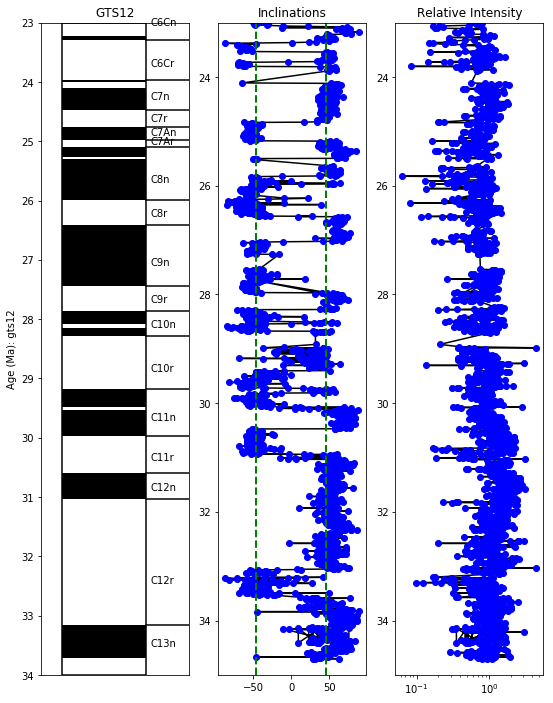

In [47]:
fig=plt.figure(1,(9,12))
ax=fig.add_subplot(131)
pmagplotlib.plot_ts(ax,23,34,timescale='gts12')
fig.add_subplot(132)
plt.plot(data.dir_inc,data.age,'k-')
plt.plot(data.dir_inc,data.age,'bo')
plt.ylim(35,23)
#plt.ylabel('Age (Ma)')
gad=np.degrees(np.arctan(2.*np.tan(np.radians(lat)))) # tan (I) = 2 tan (lat)
plt.axvline(gad,color='green',linestyle='dashed',linewidth=2)
plt.axvline(-gad,color='green',linestyle='dashed',linewidth=2)
plt.title('Inclinations')
plt.ylim(35,23)
fig.add_subplot(133)
plt.semilogx(data.int_rel/data.int_rel.mean(),data.age,'k-')
plt.semilogx(data.int_rel/data.int_rel.mean(),data.age,'bo')
plt.ylim(35,23)
plt.title('Relative Intensity');


## curie 

This can be done through **ipmag.curie()**.

In [7]:
help(ipmag.curie)

Help on function curie in module pmagpy.ipmag:

curie(path_to_file='.', file_name='magic_measurements.txt', window_length=3, save=False, save_folder='.', fmt='svg', t_begin='', t_end='')
    Plots and interprets curie temperature data.
    ***
    The 1st derivative is calculated from smoothed M-T curve (convolution
    with trianfular window with width= <-w> degrees)
    ***
    The 2nd derivative is calculated from smoothed 1st derivative curve
    (using the same sliding window width)
    ***
    The estimated curie temp. is the maximum of the 2nd derivative.
    Temperature steps should be in multiples of 1.0 degrees.
    
    Optional Parameters (defaults are used if not specified)
    ----------
    path_to_file : path to directory that contains file (default is current directory, '.')
    file_name : name of file to be opened (default is 'magic_measurements.txt')
    window_length : dimension of smoothing window (input to smooth() function)
    save : boolean argument to save pl

second derivative maximum is at T=552


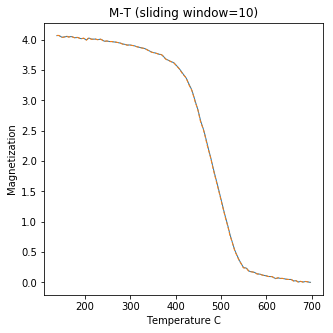

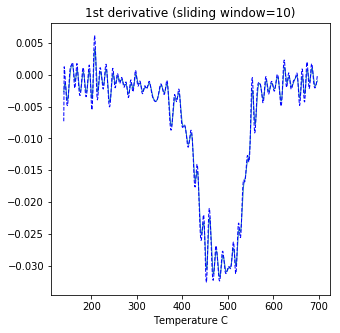

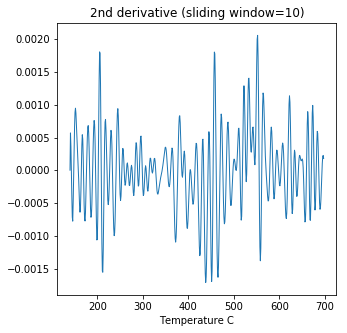

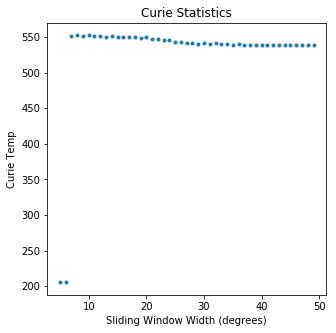

In [23]:
ipmag.curie(path_to_file='../curie',file_name='curie_example.dat',\
           window_length=10)

## dayplot_magic

This program can be replicated with **ipmag.dayplot**.

In [39]:
help(ipmag.dayplot)

Help on function dayplot in module pmagpy.ipmag:

dayplot(path_to_file='.', hyst_file='specimens.txt', rem_file='', save=False, save_folder='.', fmt='pdf', data_model=3)
    Makes 'day plots' (Day et al. 1977) and squareness/coercivity plots
    (Neel, 1955; plots after Tauxe et al., 2002); plots 'linear mixing'
    curve from Dunlop and Carter-Stiglitz (2006).
    
    Optional Parameters (defaults are used if not specified)
    ----------
    path_to_file : path to directory that contains files (default is current directory, '.')
    the default input file is 'specimens.txt' (data_model=3
    if data_model = 2, then must these are the defaults:
        hyst_file : hysteresis file (default is 'rmag_hysteresis.txt')
        rem_file : remanence file (default is 'rmag_remanence.txt')
    save : boolean argument to save plots (default is False)
    save_folder : relative directory where plots will be saved (default is current directory, '.')
    fmt : format of saved figures (default is 

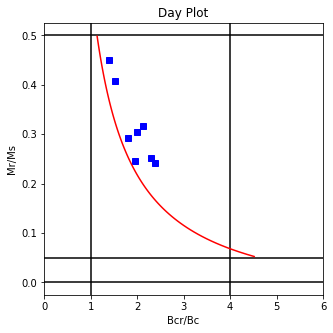

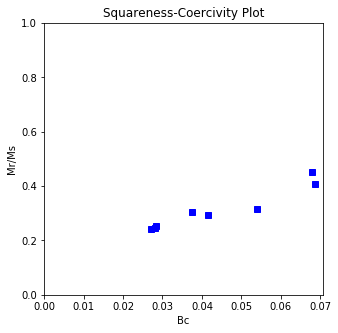

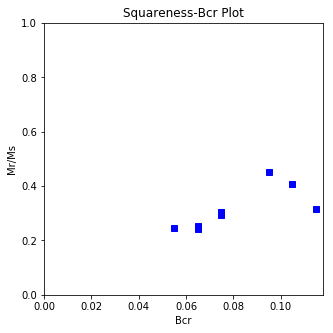

In [40]:
ipmag.dayplot(path_to_file='../dayplot_magic',hyst_file='dayplot_magic_example.dat',\
             data_model=2)

## di_eq

This program calls **pmag.dimap()** which we can do from within a Jupyter notebook.

In [42]:
help(pmag.dimap)

Help on function dimap in module pmagpy.pmag:

dimap(D, I)
    Function to map directions (declination, inclination) into an equal area
    projection (x,y).
    
    Parameters
    ----------
    D : declination (as float)
    I : inclination (as float)
    
    Returns
    -------
    XY : x, y values of directions for equal area projection [x,y]



In [54]:
DIs=np.loadtxt('../di_eq/di_eq_example.dat').transpose()
print (pmag.dimap(DIs[0],DIs[1]))

[[-0.23941025 -0.8934912 ]
 [ 0.43641303  0.71216134]
 [ 0.06384422  0.76030049]
 [ 0.32144709  0.68621606]
 [ 0.32271993  0.67056248]
 [ 0.40741223  0.54065429]
 [ 0.5801562   0.34037562]
 [ 0.10535089  0.65772758]
 [ 0.24717308  0.59968683]
 [ 0.18234908  0.61560016]
 [ 0.17481507  0.60171742]
 [ 0.282746    0.54547233]
 [ 0.26486315  0.53827299]
 [ 0.23575838  0.5345358 ]
 [ 0.29066509  0.50548208]
 [ 0.26062905  0.51151332]
 [ 0.23208983  0.51642328]
 [ 0.24444839  0.50566578]
 [ 0.27792652  0.46438138]
 [ 0.2505103   0.47715181]
 [ 0.29177004  0.44081644]
 [ 0.10876949  0.51614821]
 [ 0.19670646  0.48201446]
 [ 0.34938995  0.38129223]
 [ 0.1684068   0.47556614]
 [ 0.20628586  0.44644351]
 [ 0.17570082  0.45064929]
 [ 0.30110381  0.37853937]
 [ 0.20495497  0.42396971]
 [ 0.19975473  0.4225844 ]
 [ 0.34691999  0.30800998]
 [ 0.11902989  0.44114437]
 [ 0.23984794  0.37648585]
 [ 0.26952843  0.34250954]
 [ 0.08545091  0.42378931]
 [ 0.19222399  0.38723272]
 [ 0.17260777  0.39508358]
 

## di_geo
This program calls **pmag.dogeo()**. There is also **pmag.dogeo_V** for arrays of data. 
So start with **pmag.dogeo()**.

In [4]:
help(pmag.dogeo)

Help on function dogeo in module pmagpy.pmag:

dogeo(dec, inc, az, pl)
    Rotates declination and inclination into geographic coordinates using the
    azimuth and plunge of the X direction (lab arrow) of a specimen.
    
    Parameters
    ----------
    dec : declination in specimen coordinates
    inc : inclination in specimen coordinates
    
    Returns
    -------
    rotated_direction : tuple of declination, inclination in geographic coordinates
    
    Examples
    --------
    >>> pmag.dogeo(0.0,90.0,0.0,45.5)
    (180.0, 44.5)



In [7]:
pmag.dogeo(dec=81,inc=45.2,az=347,pl=27)

(94.835485413375622, 43.021684901096322)

In [6]:
help(pmag.dogeo_V)

Help on function dogeo_V in module pmagpy.pmag:

dogeo_V(indat)
    Rotates declination and inclination into geographic coordinates using the
    azimuth and plunge of the X direction (lab arrow) of a specimen.
    
    Parameters
    ----------
    indat: nested list of [dec, inc, az, pl] data
    
    Returns
    -------
    rotated_directions : lists of Declinations and Inclinations



In [8]:
indata=np.loadtxt('../di_geo/di_geo_example.dat')
print (indata)

[[ 288.1   35.8   67.   -36. ]
 [ 256.8   22.5   84.   -81. ]
 [ 262.4   19.1   91.   -48. ]
 [ 258.6   19.6   89.   -61. ]
 [ 259.9   54.7   49.   -76. ]
 [ 279.1   27.9   62.   -41. ]
 [ 228.3  -47.5  141.   -84. ]
 [ 249.8   25.    60.   -82. ]
 [ 239.8  -33.9  108.   -91. ]
 [ 271.7   50.8   28.   -52. ]
 [ 266.8   67.1   16.   -67. ]
 [ 238.9   51.9   27.   -76. ]
 [ 238.9   55.3   17.   -90. ]
 [ 252.6   41.    43.   -73. ]
 [ 112.7   17.1  282.6  -78. ]
 [ 134.9   -8.9  234.   -56. ]
 [ 138.6   -1.1  244.6  -73. ]
 [  83.5   31.1  292.   -28. ]
 [ 151.1  -35.2  196.6  -69. ]
 [ 146.8  -14.5  217.   -51. ]
 [  13.8   35.   332.6  -44. ]
 [ 293.1    3.9   53.5  -25.5]
 [  99.5  -11.   243.6  -30. ]
 [ 267.8  -12.7   91.5  -49. ]
 [  47.    12.8  298.6  -28. ]
 [  45.8   -9.   297.   -33.5]
 [  81.7  -26.8  254.6  -51. ]
 [  79.7  -25.7  256.   -60. ]
 [  84.7  -20.9  256.6  -60. ]
 [ 303.3   66.7    3.6  -71.5]
 [ 104.6   32.2  297.  -100.5]
 [ 262.8   77.9  357.1  -87. ]
 [  63.3

In [14]:
reload(pmag)
decs,incs=pmag.dogeo_V(indata)
print (decs,incs)

[  1.23907966e+01   1.49830732e+01   1.06667819e+01   1.14047553e+01
   1.24483163e+01   3.57299071e+02   3.53883281e+02   3.53789196e+02
   3.40503777e+02   3.42563974e+02   3.51164668e+02   3.49415385e+02
   3.46335983e+02   3.50937970e+02   3.59146910e+02   5.20812064e-01
   3.54368265e+02   9.11626301e-01   3.50170459e+02   3.54249362e-02
   3.43981389e+02   3.46130907e+02   3.47283278e+02   3.50443170e+02
   3.44495997e+02   3.52433892e+02   1.55709734e+00   4.40491709e+00
   2.54671945e+00   3.44221055e+02   3.52498530e+02   3.45060173e+02
   3.48635524e+02   3.49534584e+02   3.51173216e+02   3.57092897e+02
   3.56384865e+02] [ 18.97354242  15.5593373   18.16933424  18.99516324  17.20362035
  15.15615798  21.70912081  21.63657272  25.28892753  27.53745185
  22.32938052  29.97546268  17.1006907   24.05670149  24.95589898
  29.44812112  45.36441334  24.24032931  27.47045636  28.16456055
  -8.04836591  -6.14959601  -4.8321985   -6.65953274  -6.6962926
 -30.69729144 -22.57434594 -20.

## note to self: fix cookbook page.

## di_rot 
This program rotates dec inc pairs to a new origen.  We can call **pmag.dodirot()** for single [dec,inc,Dbar,Ibar] data or **pmag.dodirot_V()** for an array of Dec, Inc pairs.  

In [45]:
help(pmag.dodirot_V)

Help on function dodirot_V in module pmagpy.pmag:

dodirot_V(di_block, Dbar, Ibar)
    Rotate an array of dec/inc pairs to coordinate system with Dec,Inc as 0,90
    
    Parameters
    ___________________
    di_block : array of [[Dec1,Inc1],[Dec2,Inc2],....]
    Dbar : declination of desired center
    Ibar : inclination of desired center
    
    Returns
    __________
    array of rotated decs and incs: [[rot_Dec1,rot_Inc1],[rot_Dec2,rot_Inc2],....]



We do it like this: 
- read in a data set with dec inc pairs
- make an equal area projection of the data to see what they look like
- calculate the principal component with **pmag.doprinc())**
- rotate the data to the principal direction
- plot the rotated data in an equal area projection. 

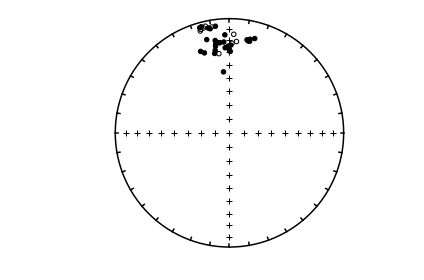

In [16]:
di_block=np.loadtxt('../di_geo/di_geo.out') # read in some data
ipmag.plot_net(1) # make the plot
ipmag.plot_di(di_block=di_block)

In [42]:
help(pmag.doprinc)
princ=pmag.doprinc(di_block)

Help on function doprinc in module pmagpy.pmag:

doprinc(data)
    Gets principal components from data in form of a list of [dec,inc] data.
    
    Parameters
    ----------
    data : nested list of dec, inc directions
    
    Returns
    -------
    ppars : dictionary with the principal components
        dec : principal directiion declination
        inc : principal direction inclination
        V2dec : intermediate eigenvector declination        
        V2inc : intermediate eigenvector inclination
        V3dec : minor eigenvector declination        
        V3inc : minor eigenvector inclination
        tau1 : major eigenvalue
        tau2 : intermediate eigenvalue
        tau3 : minor eigenvalue
        N  : number of points
        Edir : elongation direction [dec, inc, length]



In [44]:
rot_block=pmag.dodirot_V(di_block,princ['dec'],princ['inc'])
rot_block

array([[ 286.02435815,   72.05782519],
       [ 274.276049  ,   70.22090543],
       [ 284.92806468,   73.82778982],
       [ 286.94202373,   72.96225397],
       [ 280.27771216,   72.4822522 ],
       [ 304.30563895,   86.77972247],
       [ 359.89769098,   81.42521644],
       [   0.58903633,   81.51535203],
       [  40.46282285,   71.92239829],
       [  31.19590744,   71.72663361],
       [  14.40686098,   80.26484683],
       [  10.20158431,   72.45523677],
       [  57.84145159,   80.96290455],
       [  12.49485429,   78.47807897],
       [ 336.16857481,   77.4647786 ],
       [ 337.39083333,   72.90257789],
       [ 355.16071457,   57.76042705],
       [ 327.75482493,   77.51477712],
       [  10.48079578,   75.05056353],
       [ 337.45006938,   74.17995153],
       [ 147.42200844,   66.30691474],
       [ 150.22723796,   68.91756089],
       [ 151.92784861,   70.58221251],
       [ 162.26381172,   69.67831156],
       [ 147.04519212,   67.69047388],
       [ 171.84161835,   

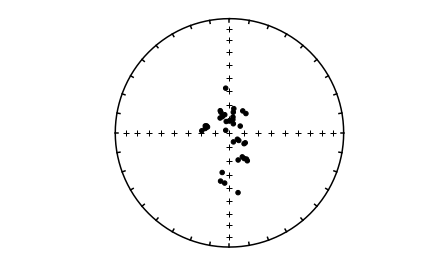

In [46]:
ipmag.plot_net(1) # make the plot
ipmag.plot_di(di_block=rot_block)

## di_tilt
We can perform the same thing as this program by calling  **pmag.dotilt** or **pmag.dotilt_V()** depending on if we have a single point or an array to rotate.

In [47]:
help(pmag.dotilt)

Help on function dotilt in module pmagpy.pmag:

dotilt(dec, inc, bed_az, bed_dip)
    Does a tilt correction on a direction (dec,inc) using bedding dip direction
    and bedding dip.
    
    Parameters
    ----------
    dec : declination directions in degrees
    inc : inclination direction in degrees
    bed_az : bedding dip direction
    bed_dip : bedding dip
    
    Returns
    -------
    dec,inc : a tuple of rotated dec, inc values
    
    Examples
    -------
    >>> pmag.dotilt(91.2,43.1,90.0,20.0)
    (90.952568837153436, 23.103411670066617)



In [49]:
reload(pmag)
help(pmag.dotilt_V)

Help on function dotilt_V in module pmagpy.pmag:

dotilt_V(indat)
    Does a tilt correction on an array with rows of dec,inc bedding dip direction and dip.
    
    Parameters
    ----------
    input : declination, inclination, bedding dip direction and bedding dip
    nested array of [[dec1, inc1, bed_az1, bed_dip1],[dec2,inc2,bed_az2,bed_dip2]...]
    
    Returns
    -------
    dec,inc : arrays of rotated declination, inclination



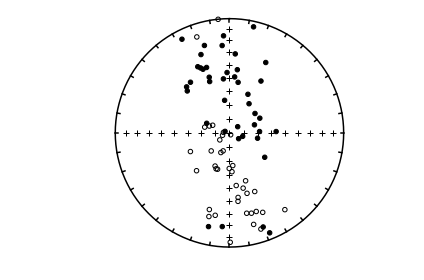

In [57]:
data=np.loadtxt('../di_tilt/di_tilt_example.dat') # load up the data
di_block=data[:,[0,1]] # let's plot the dec,inc data first
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block)

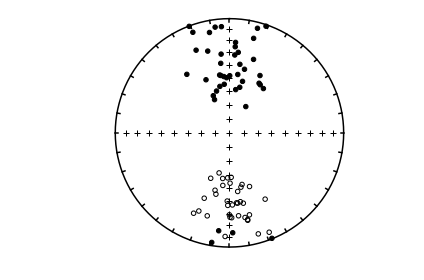

In [58]:
Dt,It=pmag.dotilt_V(data) # rotate them
ipmag.plot_net(1) # and take a look
ipmag.plot_di(dec=Dt,inc=It)

In [62]:
np.column_stack((Dt,It)) # if you want to see the output: 

array([[  3.74524673e+01,   4.95794971e+01],
       [  3.36467520e+02,   6.09447203e+01],
       [  3.38016562e+02,   2.29922937e+01],
       [  3.55656248e+02,   7.51556739e+00],
       [  8.17695697e+00,   5.86079487e+01],
       [  6.24312543e+00,   2.98149642e+01],
       [  3.57033733e+02,   5.00073921e+01],
       [  3.42811107e+02,   5.85702274e+01],
       [  3.39284414e+02,   3.48942163e-01],
       [  3.85757431e+00,   2.17049062e+01],
       [  3.54347623e+02,   4.89864710e+01],
       [  2.83925013e-01,   4.85556186e+01],
       [  3.35776430e+02,   6.39503873e+01],
       [  1.81481921e+01,   3.27972491e+01],
       [  3.53945383e+02,   3.12870301e+01],
       [  3.08201120e+01,   4.80808730e+01],
       [  2.80340193e+01,   4.25855265e+01],
       [  3.52849360e+02,   3.85903328e+01],
       [  3.51431548e+02,   4.79200709e+01],
       [  1.49895755e+01,   5.82971278e+00],
       [  2.01405693e+02,  -2.73644346e+01],
       [  1.94529222e+02,  -6.03000930e+01],
       [  

## di_vgp
This program calls **pmag.dia_vgp()** which we can do directly from within the notebook.

In [2]:
help(pmag.dia_vgp)

Help on function dia_vgp in module pmagpy.pmag:

dia_vgp(*args)
    Converts directional data (declination, inclination, alpha95) at a given
    location (Site latitude, Site longitude) to pole position (pole longitude,
    pole latitude, dp, dm)
    
    Parameters
    ----------
    Takes input as (Dec, Inc, a95, Site latitude, Site longitude)
    Input can be as individual values (5 parameters)
    or
    as a list of lists: [[Dec, Inc, a95, lat, lon],[Dec, Inc, a95, lat, lon]]
    
    Returns
    ----------
    if input is individual values for one pole the return is:
    pole longitude, pole latitude, dp, dm
    
    if input is list of lists the return is:
    list of pole longitudes, list of pole latitude, list of dp, list of dm



In [3]:
data=np.loadtxt('../di_vgp/di_vgp_example.dat')
print (data)

array([[  11. ,   63. ,   55. ,   13. ],
       [ 154. ,  -58. ,   45.5,  -73. ]])

The data are almost in the correct format, but there is no a95 field, so that will have to be inserted (as zeros). 

In [4]:
a95=np.zeros(len(data))
a95

array([ 0.,  0.])

In [7]:
DIs=data.transpose()[0:2].transpose() # get the DIs
LatLons=data.transpose()[2:].transpose() # get the Lat Lons
newdata=np.column_stack((DIs,a95,LatLons)) # stitch them back together
print (newdata)

[[  11.    63.     0.    55.    13. ]
 [ 154.   -58.     0.    45.5  -73. ]]


In [14]:
vgps=np.array(pmag.dia_vgp(newdata)) # get a tuple with lat,lon,dp,dm, convert to array
print (vgps.transpose()) #  print out the vgps

[[ 154.65869784   77.3180885     0.            0.        ]
 [   6.62978666  -69.63701906    0.            0.        ]]


## dipole_pinc
This calls **pmag.pinc()** and so will we! 


In [28]:
reload(pmag)
help(pmag.pinc)

Help on function pinc in module pmagpy.pmag:

pinc(lat)
    calculate paleoinclination from latitude using dipole formula: tan(I) = 2tan(lat)
    Parameters 
    ________________
    Input
    
    lat : either a single value or an array of latitudes
    
    Returns
    
    array of inclinations



In [29]:
lat=np.loadtxt('../dipole_pinc/dipole_pinc_example.dat')
lat

array(-24.0)

In [30]:
pmag.pinc(lat)

-41.683702035032219

## dipole_plat
This calls **pmag.plat()** and so will we: 

In [31]:
help(pmag.plat)

Help on function plat in module pmagpy.pmag:

plat(inc)
    calculate paleolatitude from inclination using dipole formula: tan(I) = 2tan(lat)
    Parameters 
    ________________
    Input
    
    inc : either a single value or an array of inclinations
    
    Returns
    
    array of latitudes



In [32]:
inc=np.loadtxt('../dipole_plat/dipole_plat_example.dat')
inc

array(23.0)

In [33]:
pmag.plat(inc)

11.982503173060421

## dmag_magic
This program calls **pmagplotlib.plotMT()** to plot the demagnetization curve for a sample, site, or entire data file interactively.  There is a version that will prepare dataframes for plotting with this function called **ipmag.plot_dmag()**. So let's try that: 

In [50]:
reload(ipmag)
help(ipmag.plot_dmag)

Help on function plot_dmag in module pmagpy.ipmag:

plot_dmag(data='', title='', fignum=1, norm=1)
    plots demagenetization data versus step for all specimens in pandas dataframe datablock
    
    Parameters
    ______________
    data : Pandas dataframe with MagIC data model 3 columns:
        fignum : figure number
        specimen : specimen name
        demag_key : one of these: ['treat_temp','treat_ac_field','treat_mw_energy']
            selected using method_codes : ['LT_T-Z','LT-AF-Z','LT-M-Z'] respectively
        intensity  : one of these: ['magn_moment', 'magn_volume', 'magn_mass']
        quality : the quality column of the DataFrame
     title : title for plot
     norm : if True, normalize data to first step
    Output : 
      matptlotlib plot



Read in data from a MagIC data model 3 file:

In [57]:
data=pd.read_csv('../dmag_magic/measurements.txt',sep='\t',header=1)
data.columns

Index(['experiment', 'specimen', 'measurement', 'dir_csd', 'dir_dec',
       'dir_inc', 'hyst_charging_mode', 'hyst_loop', 'hyst_sweep_rate',
       'treat_ac_field', 'treat_ac_field_dc_off', 'treat_ac_field_dc_on',
       'treat_ac_field_decay_rate', 'treat_dc_field', 'treat_dc_field_ac_off',
       'treat_dc_field_ac_on', 'treat_dc_field_decay_rate',
       'treat_dc_field_phi', 'treat_dc_field_theta', 'treat_mw_energy',
       'treat_mw_integral', 'treat_mw_power', 'treat_mw_time',
       'treat_step_num', 'treat_temp', 'treat_temp_dc_off', 'treat_temp_dc_on',
       'treat_temp_decay_rate', 'magn_mass', 'magn_moment', 'magn_volume',
       'citations', 'instrument_codes', 'method_codes', 'quality', 'standard',
       'meas_field_ac', 'meas_field_dc', 'meas_freq', 'meas_n_orient',
       'meas_orient_phi', 'meas_orient_theta', 'meas_pos_x', 'meas_pos_y',
       'meas_pos_z', 'meas_temp', 'meas_temp_change', 'analysts',
       'description', 'software_packages', 'timestamp', 'magn_r2

We could hunt through the magn_* columns to see what is non-blank, but this data file has magn_moment data in it. 
We can make the plots in this way: 
- select the AF demagnetization data with method_codes = 'LT-AF-Z'
- make a dataframe with these columns:
     'specimen','treat_ac_field','magn_moment',and 'quality'
- call ipmag.plot_dmag() to view the plot: 

In [58]:
df=data[data.method_codes.str.contains('LT-AF-Z')] # select the thermal demag data
df=df[['specimen','treat_ac_field','magn_moment','quality']]
#df=df[df.specimen.str.contains('mc01')]
df=df.dropna(subset=['treat_ac_field','magn_moment'])
df.head()

,specimen,treat_ac_field,magn_moment,quality
1,mc01f,0.0050,0.000028,g
2,mc01f,0.0075,0.000028,g
3,mc01f,0.0100,0.000027,g
4,mc01f,0.0125,0.000026,g
5,mc01f,0.0150,0.000025,g


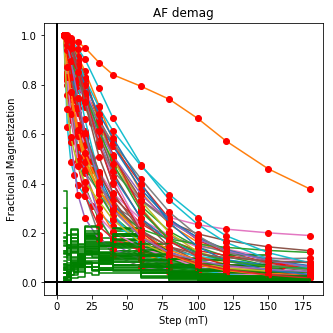

In [59]:
reload(ipmag)
ipmag.plot_dmag(data=df,title="AF demag",fignum=1)

This plotted all the data in the file.  we could also plot the data by site:
- read in the specimens table to relate specimen to sample
- read in the sample table to relate sample to site
- merge the sample and site columns into the measurement table on the specimen column
- get a unique list of site names and walk through them one by one

In [60]:
spec_df=pd.read_csv('../dmag_magic/specimens.txt',sep='\t',header=1) # read in specimen table
samp_df=pd.read_csv('../dmag_magic/samples.txt',sep='\t',header=1) # read in sample table
spec_df=spec_df[['specimen','sample']] # trim specimen table to required columns
samp_df=samp_df[['sample','site']] # ditto sample table
df_ext=pd.merge(df,spec_df,how='inner',on='specimen') # merge sample to specimen name
df_ext=pd.merge(df_ext,samp_df,how='inner',on='sample') # merge site to sample name
df_ext.head() # see how we did

,specimen,treat_ac_field,magn_moment,quality,sample,site
0,mc01f,0.0050,0.000028,g,mc01f,mc01
1,mc01f,0.0075,0.000028,g,mc01f,mc01
2,mc01f,0.0100,0.000027,g,mc01f,mc01
3,mc01f,0.0125,0.000026,g,mc01f,mc01
4,mc01f,0.0150,0.000025,g,mc01f,mc01


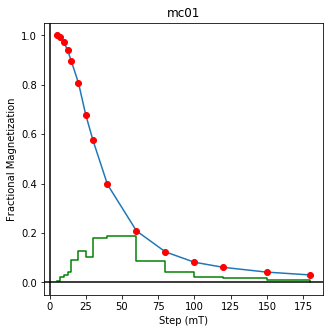

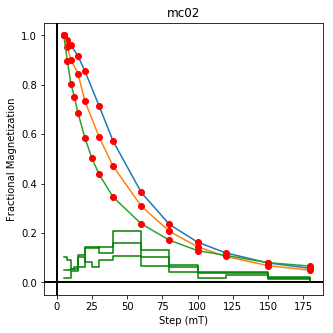

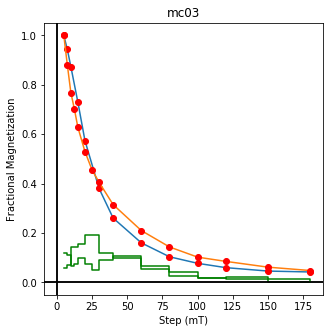

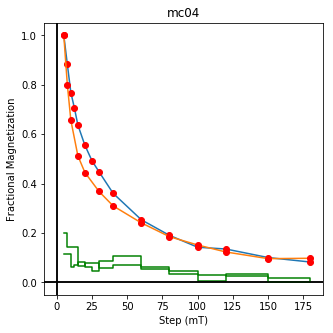

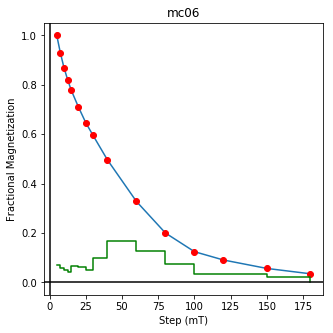

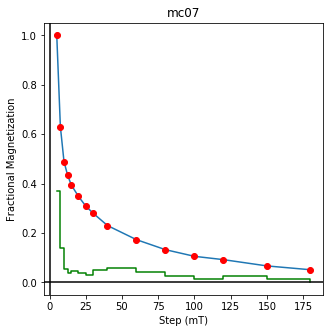

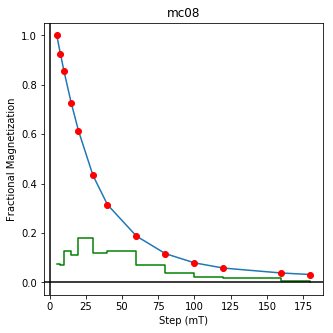

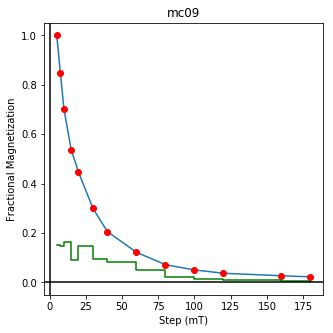

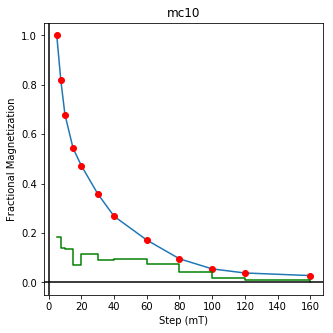

In [62]:
sites=df_ext.site.unique()
cnt=1
for site in sites:
    site_df=df_ext[df_ext.site==site] # fish out this site
    site_df=site_df[['specimen','treat_ac_field','magn_moment','quality']] # trim to essentials
    ipmag.plot_dmag(data=site_df,title=site,fignum=cnt)
    cnt+=1

We could repeat for thermal data if we felt like it using 'LT-T-Z' as the method_code key
and treat_temp as the step.  We could also save the plots using plt.savefig('FIGNAME.FMT') where FIGNAME could be the site, location, demag type as you wish.  